In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import datetime

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv(r'Visadataset.csv')
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


# Data Cleaning
* Handling Missing values 
* Handling Duplicates
* Check data type
* Understand the dataset

In [4]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.drop('case_id',axis=1,inplace=True)
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


# Feature Engineering

In [7]:
from datetime import date

In [8]:
today=date.today()
curr_yr=today.year

In [9]:
curr_yr

2024

In [10]:
df['comp_age']=curr_yr - df['yr_of_estab']

In [11]:
df['comp_age'].head()

0     17
1     22
2     16
3    127
4     19
Name: comp_age, dtype: int64

In [12]:
df.drop('yr_of_estab',inplace=True,axis=1)

### Type of Features

**Numeric Features**

In [13]:
num_feature=[i for i in df.columns if df[i].dtype != 'O']
num_feature

['no_of_employees', 'prevailing_wage', 'comp_age']

**Categorical Features**

In [14]:
cat_feature=[i for i in df.columns if df[i].dtype == 'O']
cat_feature

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

**Discrete features**

In [15]:
dis_feature=[i for i in num_feature if len(df[i].unique())<=25]
dis_feature

[]

**Continues Features**

In [16]:
cont_feature=[i for i in num_feature if i not in dis_feature]
cont_feature

['no_of_employees', 'prevailing_wage', 'comp_age']

### Split X and Y

In [17]:
X=df.drop('case_status',axis=1)
y=df['case_status']

In [18]:
y.head()

0       Denied
1    Certified
2       Denied
3       Denied
4    Certified
Name: case_status, dtype: object

In [19]:
y=np.where(y=='Denied',1,0)
y

array([1, 0, 1, ..., 0, 0, 0])

## Feature Transformation

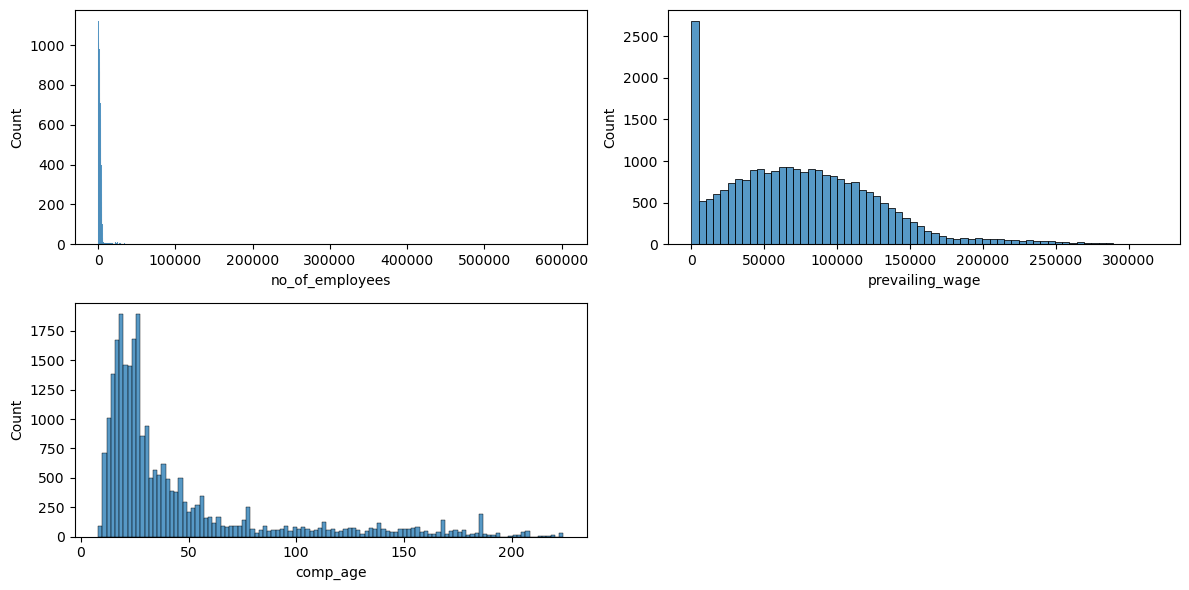

In [20]:
plt.figure(figsize=(12,6))
for i,col in enumerate(['no_of_employees','prevailing_wage','comp_age']):
    plt.subplot(2,2,i+1)
    sns.histplot(x=X[col])
    plt.xlabel(col)
    plt.tight_layout()

* No of employees and Copmany age column is skewed
* Apply a power transform featurewise to make data more Gaussian-like.

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform.

**Checking Skewness**

**What is Skewness ?**

* Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero

In [21]:
X[cont_feature].skew()

no_of_employees    12.265260
prevailing_wage     0.755776
comp_age            2.037301
dtype: float64

- Positiviely Skewed : company_age, no_of_employees.
- We can handle outliers and then check the skewness.

## Apply Power Transformer to Check if it can reduces the outliers

In [22]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
trans_features = ['no_of_employees','comp_age']
X_copy = pt.fit_transform(X[trans_features])

In [23]:
X_copy = pd.DataFrame(X_copy,columns=trans_features)

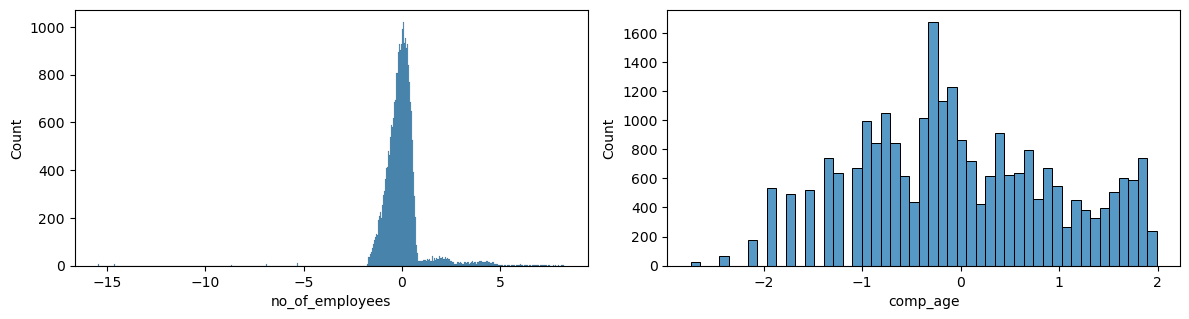

In [24]:
plt.figure(figsize=(12,6))
for i,col in enumerate(trans_features):
    plt.subplot(2,2,i+1)
    sns.histplot(x=X_copy[col])
    plt.xlabel(col)
    plt.tight_layout()

**Checking Skewness**

In [25]:
X_copy.skew()

no_of_employees    0.399339
comp_age           0.103264
dtype: float64

- Here Yeo-Johnson is used and it supports both positive or negative data for transformation.
- So Power Transformer with yeo-johnson can be used.

In [26]:
for i in cat_feature:
    print(i ,':',df[i].nunique())

continent : 6
education_of_employee : 4
has_job_experience : 2
requires_job_training : 2
region_of_employment : 5
unit_of_wage : 4
full_time_position : 2
case_status : 2


## Feature Encoding and Scaling
 
 **One Hot Encoding for Columns which had lesser unique values and not ordinal**
* One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

**Ordinal Encoding for Columns which has many unique categories** 
* Ordinal encoding is used here as label encoder is supported for column transformer.
* Ordinal encoding is used for Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values.

**Standard Scaler** 
* Standardize features by removing the mean and scaling to unit variance.

**Power Transformer**
* Power transforms are a technique for transforming numerical input or output variables to have a Gaussian or more-Gaussian-like probability distribution.

### **Preprocessing using Column Transformer**

In [27]:
ord_col=['continent', 'education_of_employee','region_of_employment','unit_of_wage']
onehot_col=['has_job_experience','requires_job_training','full_time_position']
transform_col=['no_of_employees', 'comp_age']

from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

onehot_enc=OneHotEncoder()
ordinal_enc=OrdinalEncoder()
num_enc=StandardScaler()

transform_pipeline=Pipeline(steps=[('Transform',PowerTransformer(method='yeo-johnson'))])

preprocessing=ColumnTransformer(
    [
        ("Onehot-encoder",onehot_enc,onehot_col),
        ("Ordinal-encoder",ordinal_enc,ord_col),
        ("Transformer",transform_pipeline,transform_col),
        ("Standardscaler",num_enc,num_feature)
    ])

In [28]:
X=preprocessing.fit_transform(X)

In [29]:
X

array([[ 1.        ,  0.        ,  1.        , ...,  0.38666657,
        -1.39853722, -0.65122993],
       [ 0.        ,  1.        ,  1.        , ..., -0.14228155,
         0.1698353 , -0.53321103],
       [ 1.        ,  0.        ,  0.        , ...,  1.69498375,
         0.91907852, -0.6748337 ],
       ...,
       [ 0.        ,  1.        ,  1.        , ..., -0.19871259,
         1.36027953,  1.63833662],
       [ 0.        ,  1.        ,  0.        , ..., -0.16387483,
         0.22150859,  2.18122353],
       [ 0.        ,  1.        ,  1.        , ..., -0.10805575,
        -0.06776315,  0.45814768]])

# Classification

In [30]:
from imblearn.combine import SMOTETomek,SMOTEENN

# smt=SMOTETomek(random_state=42,sampling_strategy='minority')
smt=SMOTEENN(random_state=42,sampling_strategy='minority' )
X_res,y_res=smt.fit_resample(X,y)

In [31]:
X_res.shape,y_res.shape

((17034, 15), (17034,))

## Train Test Split
- The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

- It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms.

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13627, 15), (3407, 15), (13627,), (3407,))

In [34]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [35]:
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [36]:
def eval_clf(true,predicted):
    acc=accuracy_score(true,predicted)
    f1=f1_score(true,predicted)
    precision=precision_score(true,predicted)
    recall=recall_score(true,predicted)
    roc_auc=roc_auc_score(true,predicted)
    return acc,f1,precision,recall,roc_auc

In [37]:
models={
    "Randomforest Classifier":RandomForestClassifier(),
    "AdaBoost Classifier":AdaBoostClassifier(),
    "GradientBoosting Classifier":GradientBoostingClassifier(),
    "Logistic Regression":LogisticRegression(),
    "DecisionTree Classifier":DecisionTreeClassifier(),
    "KNeighbors Classifier":KNeighborsClassifier(),
    "Support Vector Classifier":SVC(),
    "CatBoost Classifier":CatBoostClassifier(),
    "XGB Classifier":XGBClassifier()
}

In [38]:
list(models.keys())

['Randomforest Classifier',
 'AdaBoost Classifier',
 'GradientBoosting Classifier',
 'Logistic Regression',
 'DecisionTree Classifier',
 'KNeighbors Classifier',
 'Support Vector Classifier',
 'CatBoost Classifier',
 'XGB Classifier']

In [39]:
def eval_models(X,y,models):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models_list=[]
    acc_list=[]
    auc_list=[]

    for i in range(len(list(models))):
        model=list(models.values())[i]
        model.fit(X_train,y_train)

        pred=model.predict(X_test)
    
        model_accuracy,model_f1_score,model_precision,model_recall,model_roc_auc=eval_clf(y_test,pred)
    
        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])
    
        print("Model performance")
        print(" - Accuracy : {:.4f}".format(model_accuracy))
        acc_list.append(model_accuracy)
        print(" - F1 score : {:.4f}".format(model_f1_score))
        print(" - Precision score : {:.4f}".format(model_precision))
        print(" - Recall score : {:.4f}".format(model_recall))
        print(" - ROC AUC score : {:.4f}".format(model_roc_auc))
        auc_list.append(model_roc_auc)
        print("="*35)
        print("\n")

    result=pd.DataFrame(list(zip(models_list,acc_list)),columns=["Model","Accuracy"]).sort_values(by=["Accuracy"],ascending=False)

    return result

## Model Training 

In [40]:
model_result=eval_models(X_res,y_res,models)

Randomforest Classifier
Model performance
 - Accuracy : 0.9489
 - F1 score : 0.9534
 - Precision score : 0.9524
 - Recall score : 0.9544
 - ROC AUC score : 0.9484


AdaBoost Classifier
Model performance
 - Accuracy : 0.8568
 - F1 score : 0.8696
 - Precision score : 0.8668
 - Recall score : 0.8724
 - ROC AUC score : 0.8551


GradientBoosting Classifier
Model performance
 - Accuracy : 0.8788
 - F1 score : 0.8880
 - Precision score : 0.8985
 - Recall score : 0.8777
 - ROC AUC score : 0.8789


Logistic Regression
Model performance
 - Accuracy : 0.7200
 - F1 score : 0.7403
 - Precision score : 0.7518
 - Recall score : 0.7292
 - ROC AUC score : 0.7190


DecisionTree Classifier
Model performance
 - Accuracy : 0.9158
 - F1 score : 0.9234
 - Precision score : 0.9192
 - Recall score : 0.9276
 - ROC AUC score : 0.9145


KNeighbors Classifier
Model performance
 - Accuracy : 0.9407
 - F1 score : 0.9467
 - Precision score : 0.9315
 - Recall score : 0.9625
 - ROC AUC score : 0.9384


Support Vector C

In [41]:
model_result

,Model,Accuracy
0,Randomforest Classifier,0.948929
5,KNeighbors Classifier,0.940710
8,XGB Classifier,0.928970
7,CatBoost Classifier,0.921632
4,DecisionTree Classifier,0.915762
2,GradientBoosting Classifier,0.878779
1,AdaBoost Classifier,0.856765
6,Support Vector Classifier,0.790431
3,Logistic Regression,0.719988


**Hyper Parameter Tuning**

In [62]:
## Random Forest
rf_params={
    "max_depth":[int(x) for x in np.linspace(2,20,num=10)],
    "max_features":["sqrt", "log2", None],
    "n_estimators":[int(x) for x in np.linspace(50,200,num=4)]
}

## K-Nearest Neighbor
knn_params={
    "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "n_neighbors" : [int(x) for x in np.linspace(1,9,num=5)],
    "weights" : ['uniform', 'distance']
}

## XGBoost
xgb_params={
    "max_depth":[int(x) for x in np.linspace(2,20,num=10)],
    "min_child_weight" :[int(x) for x in np.linspace(2,20,num=10)],
    "n_estimators":[int(x) for x in np.linspace(50,200,num=4)]
}


In [64]:
randomcv_models=[
    ("Randomforest Classifier",RandomForestClassifier(),rf_params),
    ("KNeighbors Classifier",KNeighborsClassifier(),knn_params),
    ("XGB Classifier",XGBClassifier(),xgb_params)
]

In [68]:
from sklearn.model_selection import RandomizedSearchCV

model_best_param={}
for name,model,param in randomcv_models:
    random = RandomizedSearchCV(
            estimator=model,
            param_distributions=param,
            n_iter=100,
            n_jobs=-1,
            cv=3,
            verbose=2
    )

    random.fit(X_res,y_res)
    model_best_param[name]=random.best_params_

for model in model_best_param:
    print(f"---------------- Best Params for {model} -------------------")
    print(model_best_param[model])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for Randomforest Classifier -------------------
{'n_estimators': 100, 'max_features': 'log2', 'max_depth': 20}
---------------- Best Params for KNeighbors Classifier -------------------
{'weights': 'uniform', 'n_neighbors': 1, 'algorithm': 'auto'}
---------------- Best Params for XGB Classifier -------------------
{'n_estimators': 100, 'min_child_weight': 2, 'max_depth': 20}


In [69]:
model_best_param

{'Randomforest Classifier': {'n_estimators': 100,
  'max_features': 'log2',
  'max_depth': 20},
 'KNeighbors Classifier': {'weights': 'uniform',
  'n_neighbors': 1,
  'algorithm': 'auto'},
 'XGB Classifier': {'n_estimators': 100,
  'min_child_weight': 2,
  'max_depth': 20}}

In [73]:
best_models = {
    'Randomforest Classifier':RandomForestClassifier(**model_best_param["Randomforest Classifier"]),
    'KNeighbors Classifier':KNeighborsClassifier(**model_best_param["KNeighbors Classifier"]),
    'XGB Classifier':XGBClassifier(**model_best_param["XGB Classifier"])
}

In [74]:
hyper_param_tuned_report=eval_models(X_res,y_res,models=best_models)

Randomforest Classifier
Model performance
 - Accuracy : 0.9457
 - F1 score : 0.9505
 - Precision score : 0.9492
 - Recall score : 0.9517
 - ROC AUC score : 0.9451


KNeighbors Classifier
Model performance
 - Accuracy : 0.9836
 - F1 score : 0.9850
 - Precision score : 0.9814
 - Recall score : 0.9887
 - ROC AUC score : 0.9830


XGB Classifier
Model performance
 - Accuracy : 0.9480
 - F1 score : 0.9528
 - Precision score : 0.9480
 - Recall score : 0.9576
 - ROC AUC score : 0.9470




In [75]:
hyper_param_tuned_report

,Model,Accuracy
1,KNeighbors Classifier,0.983563
2,XGB Classifier,0.948048
0,Randomforest Classifier,0.945700


In [78]:
final_model = KNeighborsClassifier(**model_best_param["KNeighbors Classifier"]).fit(X_train,y_train)
y_pred = final_model.predict(X_test)
print ("Accuracy Score value: {:.4f}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

Accuracy Score value: 0.9836
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1542
           1       0.98      0.99      0.99      1865

    accuracy                           0.98      3407
   macro avg       0.98      0.98      0.98      3407
weighted avg       0.98      0.98      0.98      3407



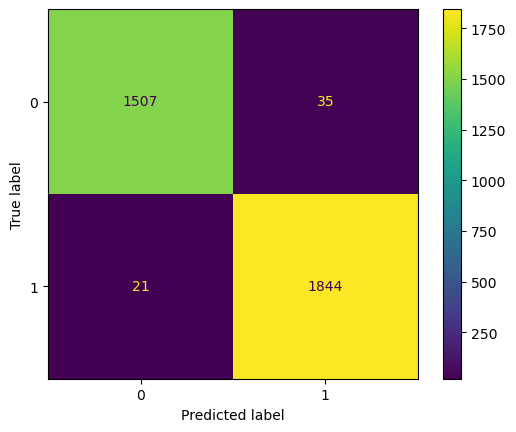

In [80]:
ConfusionMatrixDisplay.from_estimator(final_model,X_test,y_test)

## Best Model is K-Nearest Neighbor(KNN) with Accuracy 98.36%

                                        ------------------------------------------------------